<a href="https://colab.research.google.com/github/UtwoA/Introduction_to_ML/blob/main/ml5part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [579]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal, fft
import pywt
from scipy.signal import savgol_filter
from scipy.stats import zscore

In [580]:
df = pd.read_csv('sin_table.txt', sep='\t', encoding='windows-1251')
print(df.head())
print(df.info())

      x    sin(x)
0  0.00  0.000000
1  0.05  0.049979
2  0.10  0.099833
3  0.15  0.149438
4  0.20  0.198669
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       201 non-null    float64
 1   sin(x)  183 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB
None


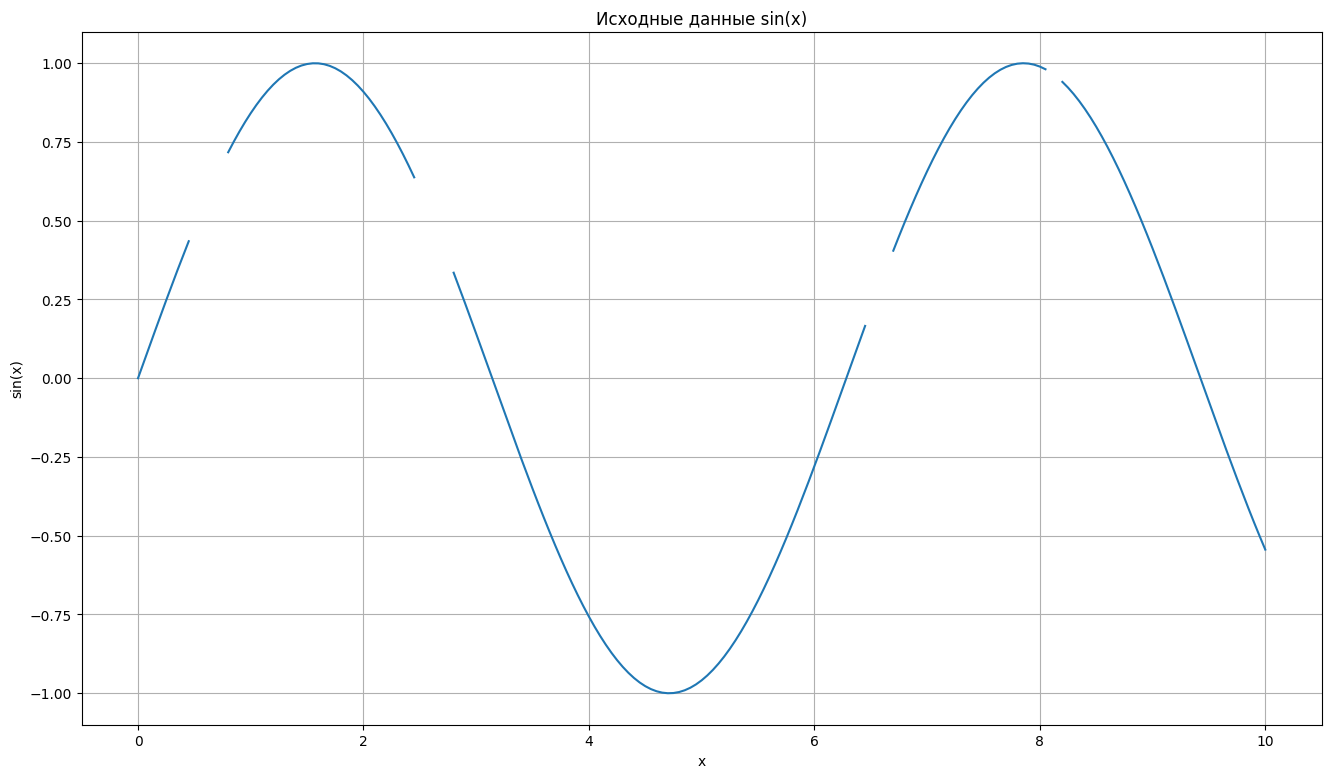

In [581]:
plt.figure(figsize=(16,9))
plt.plot(df["x"], df["sin(x)"], linestyle="-")
plt.title("Исходные данные sin(x)")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.grid(True)
plt.show()

In [582]:
df_processed = df.copy()
df_processed["sin(x)"] = df_processed["sin(x)"].interpolate(method="linear")

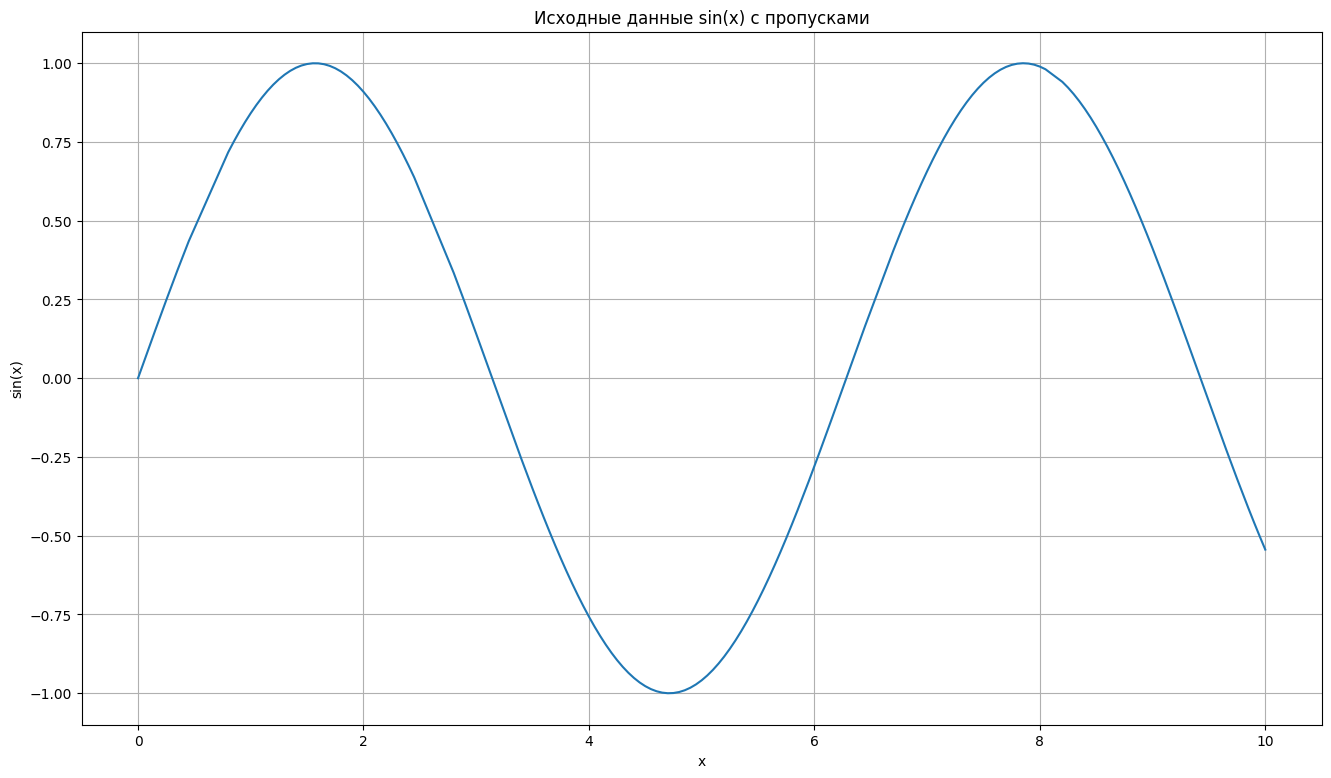

In [583]:
plt.figure(figsize=(16,9))
plt.plot(df_processed["x"], df_processed["sin(x)"], linestyle="-")
plt.title("Исходные данные sin(x) с пропусками")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.grid(True)
plt.show()

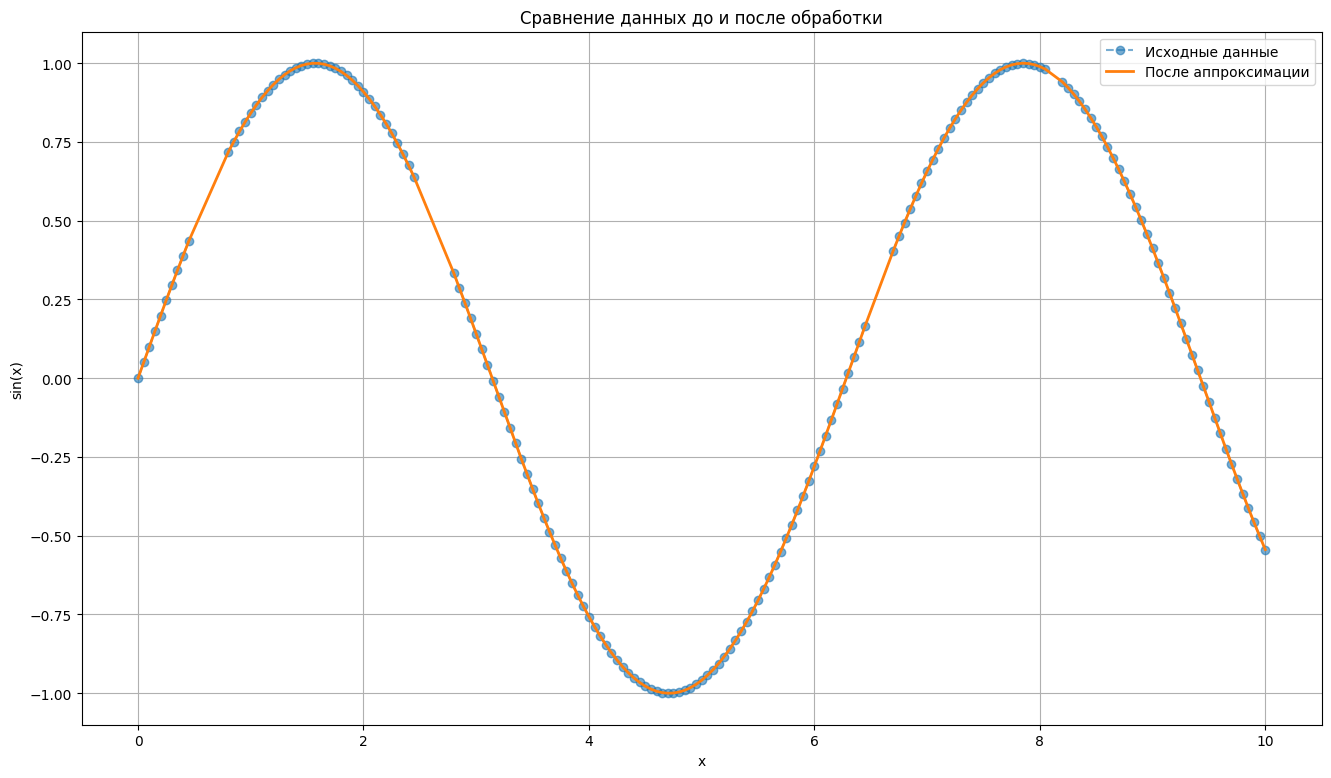

In [584]:
plt.figure(figsize=(16,9))

plt.plot(df["x"], df["sin(x)"],
         'o--', label="Исходные данные", alpha=0.6)

plt.plot(df_processed["x"], df_processed["sin(x)"],
         '', label="После аппроксимации", linewidth=2)

plt.title("Сравнение данных до и после обработки")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.grid(True)
plt.legend()
plt.show()

In [585]:
df_compare = pd.DataFrame({
    "x": df["x"],
    "Исходное": df["sin(x)"],
    "Восстановленное": df_processed["sin(x)"]
})

df_compare[df_compare["Исходное"].isna()]

,x,Исходное,Восстановленное
10,0.50,NaN,0.475307
11,0.55,NaN,0.515649
12,0.60,NaN,0.555990
13,0.65,NaN,0.596332
14,0.70,NaN,0.636673
15,0.75,NaN,0.677015
50,2.50,NaN,0.594511
51,2.55,NaN,0.551257
52,2.60,NaN,0.508003
53,2.65,NaN,0.464750


#Задание 2

In [586]:
df = pd.read_csv('Anketa.txt', sep='\t', encoding='windows-1251')
print(df.head(10))
print(df.info())

      Фамилия        Имя       Отчество  КодАнкеты  Сумма кредита, руб#
0     Абаджев    Николай     Васильевич       3049                47000
1       Абаев  Александр     Викторович       3061                32000
2   Алексенко    Дмитрий     Дмитриевич       4012                64000
3      Беляев       Юрий    Алефтинович       3053                25000
4      Бобров     Андрей   Владимирович       4076               105000
5    Бочкарев    Рудольф     Алексеевич       4002                31000
6       Варов   Валентин       Иванович       4028                57000
7  Вахромеева      Елена  Александровна       4043                18000
8     Видеева  Екатерина    Анатольевна       4006                25000
9     Вшивцев      Игорь     Викторович       4075                45000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Фам

In [587]:
df.describe()

,КодАнкеты,"Сумма кредита, руб#"
count,87.000000,87.000000
mean,3792.471264,50160.919540
std,427.087482,20141.865207
min,3049.000000,17000.000000
25%,3537.500000,38000.000000
50%,4021.000000,47000.000000
75%,4056.500000,60500.000000
max,4084.000000,140000.000000


In [588]:
df.columns

Index(['Фамилия', 'Имя', 'Отчество', 'КодАнкеты', 'Сумма кредита, руб#'], dtype='object')

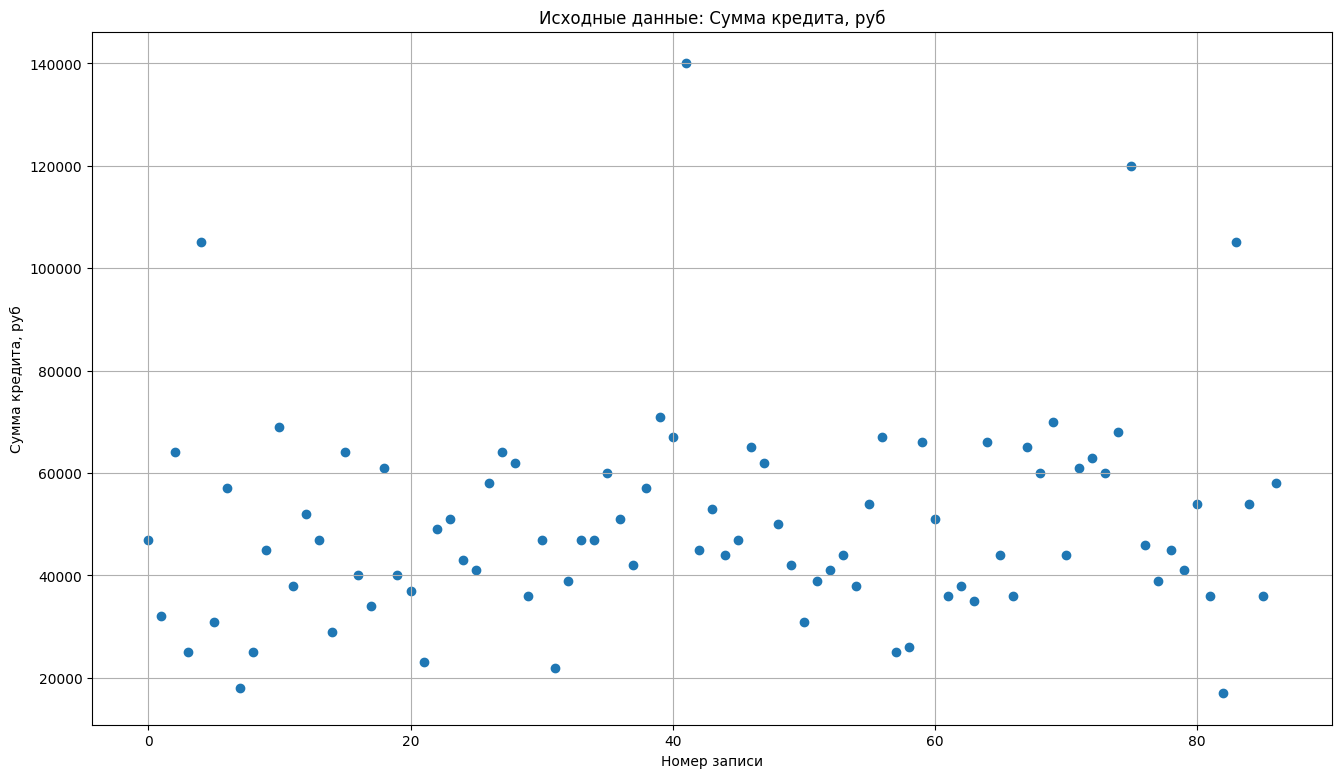

In [589]:
plt.figure(figsize=(16,9))
plt.scatter(range(len(df)), df["Сумма кредита, руб#"])
plt.title("Исходные данные: Сумма кредита, руб")
plt.xlabel("Номер записи")
plt.ylabel("Сумма кредита, руб")
plt.grid(True)
plt.show()


In [590]:
df_soft = df.copy()

col = "Сумма кредита, руб#"

low = df_soft[col].quantile(0.05)
high = df_soft[col].quantile(0.95)

df_soft[col] = np.clip(df_soft[col], low, high)

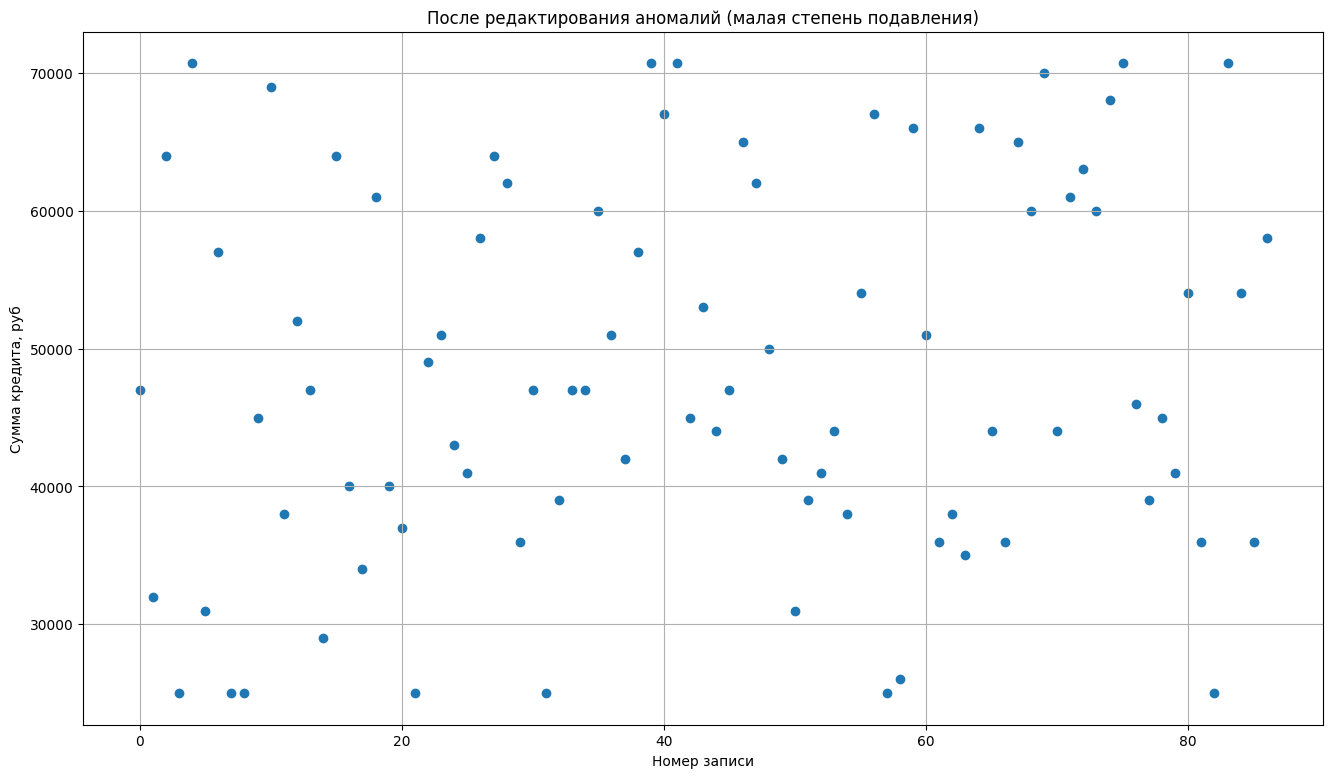

In [591]:
plt.figure(figsize=(16,9))
plt.scatter(range(len(df_soft)), df_soft[col])
plt.title("После редактирования аномалий (малая степень подавления)")
plt.xlabel("Номер записи")
plt.ylabel("Сумма кредита, руб")
plt.grid(True)
plt.show()

In [592]:
changed = df[df[col] != df_soft[col]]

changed_df = pd.DataFrame({
    "Исходное": changed[col],
    "Заменённое": df_soft.loc[changed.index, col]
})

print(changed_df)

    Исходное  Заменённое
4     105000       70700
7      18000       25000
21     23000       25000
31     22000       25000
39     71000       70700
41    140000       70700
75    120000       70700
82     17000       25000
83    105000       70700


In [593]:
df_hard = df.copy()

low_h = df_hard[col].quantile(0.01)
high_h = df_hard[col].quantile(0.99)

df_hard[col] = np.clip(df_hard[col].astype(float), low_h, high_h)

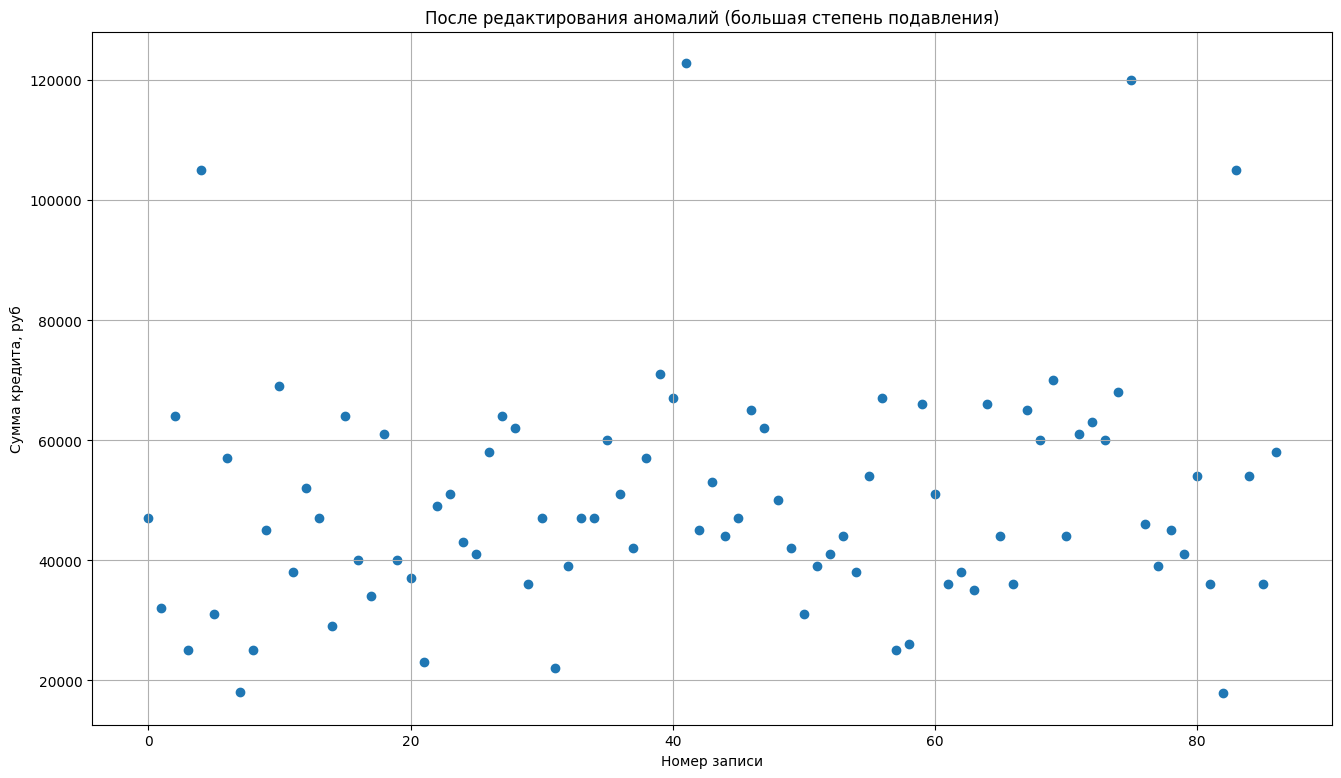

In [594]:
plt.figure(figsize=(16,9))
plt.scatter(range(len(df_hard)), df_hard[col])
plt.title("После редактирования аномалий (большая степень подавления)")
plt.xlabel("Номер записи")
plt.ylabel("Сумма кредита, руб")
plt.grid(True)
plt.show()

In [595]:
compare = pd.DataFrame({
    "Исходное": df[col],
    "Малая коррекция": df_soft[col],
    "Большая коррекция": df_hard[col]
})

compare[(compare["Исходное"] != compare["Малая коррекция"]) |
        (compare["Исходное"] != compare["Большая коррекция"])]

,Исходное,Малая коррекция,Большая коррекция
4,105000,70700,105000.0
7,18000,25000,18000.0
21,23000,25000,23000.0
31,22000,25000,22000.0
39,71000,70700,71000.0
41,140000,70700,122800.0
75,120000,70700,120000.0
82,17000,25000,17860.0
83,105000,70700,105000.0


#3 задание -


In [596]:
df = pd.read_csv('dynamics_website.txt', sep='\t', encoding='windows-1251', dayfirst=True, decimal=',')
print(df.head(10))

         Дата  Посещения
0  01.01.2009    163.654
1  01.12.2008    180.472
2  01.11.2008    184.680
3  01.10.2008    190.564
4  01.09.2008    164.578
5  01.08.2008    135.374
6  01.07.2008    149.139
7  01.06.2008    143.683
8  01.05.2008    166.933
9  01.04.2008    175.628


In [597]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Дата       39 non-null     object 
 1   Посещения  39 non-null     float64
dtypes: float64(1), object(1)
memory usage: 756.0+ bytes


In [598]:
time = df['Дата']
values = df['Посещения'].values

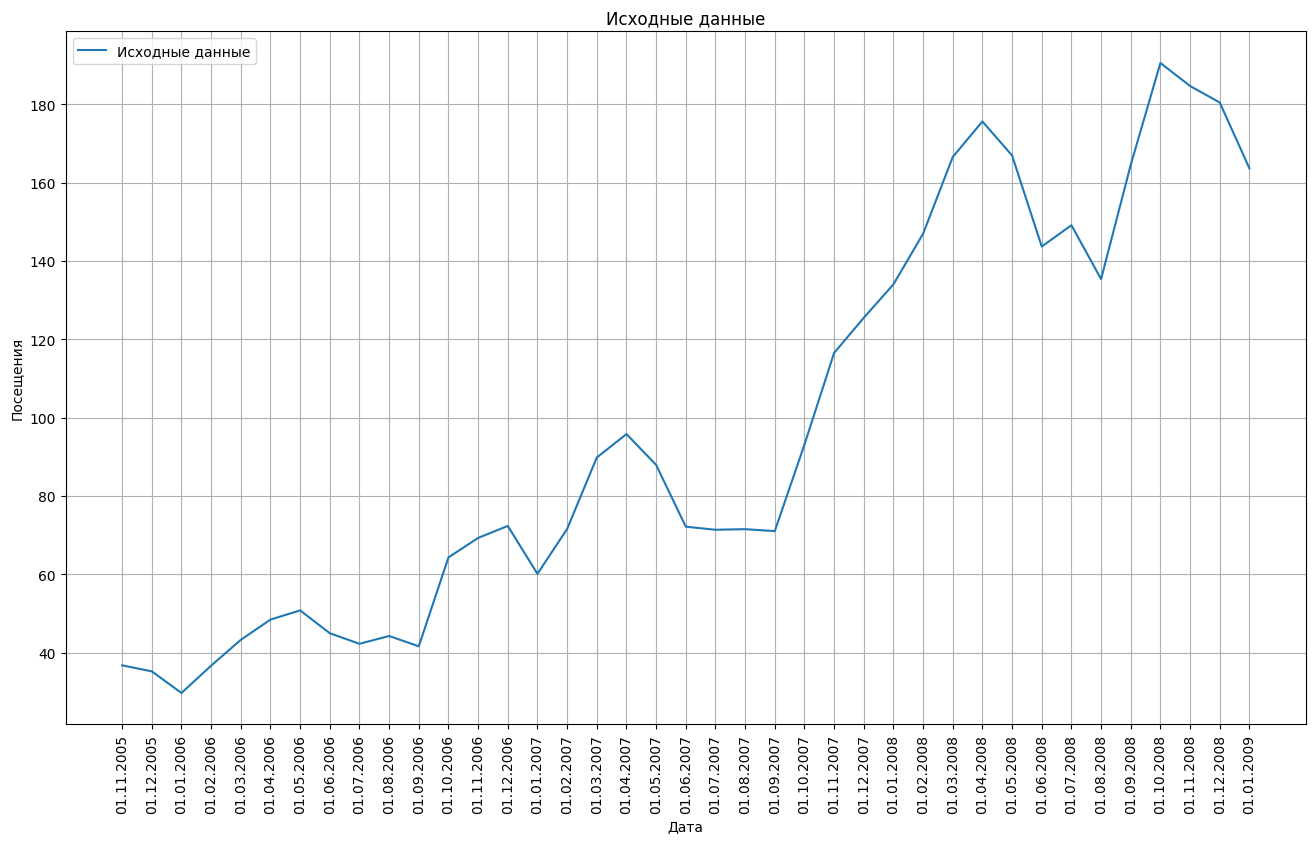

In [599]:
plt.figure(figsize=(16, 9))
plt.plot(time, values, label='Исходные данные')
plt.title('Исходные данные')
plt.xlabel('Дата')
plt.ylabel('Посещения')
plt.legend()
plt.grid()
plt.xticks(rotation=90)

plt.gca().invert_xaxis()

plt.show()

In [600]:
print(df['Посещения'].describe())

count     39.000000
mean      97.142077
std       51.686187
min       29.697000
25%       49.610500
50%       72.343000
75%      145.319500
max      190.564000
Name: Посещения, dtype: float64


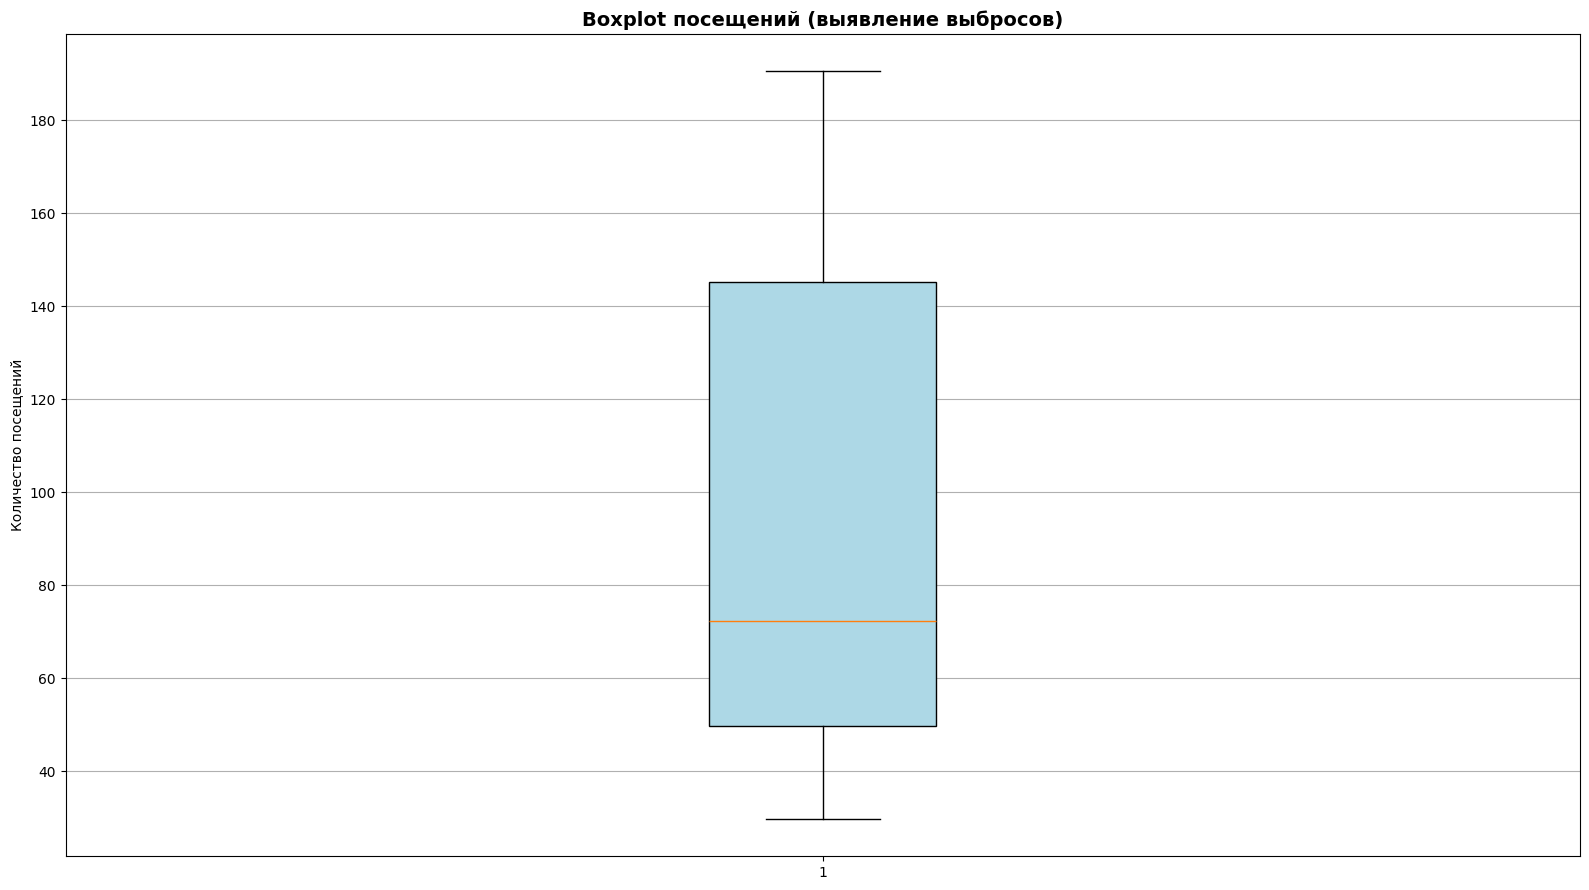

In [601]:
plt.figure(figsize=(16, 9))
plt.boxplot(df['Посещения'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot посещений (выявление выбросов)', fontsize=14, fontweight='bold')
plt.ylabel('Количество посещений')
plt.grid(True, alpha=1, axis='y')
plt.tight_layout()
plt.show()


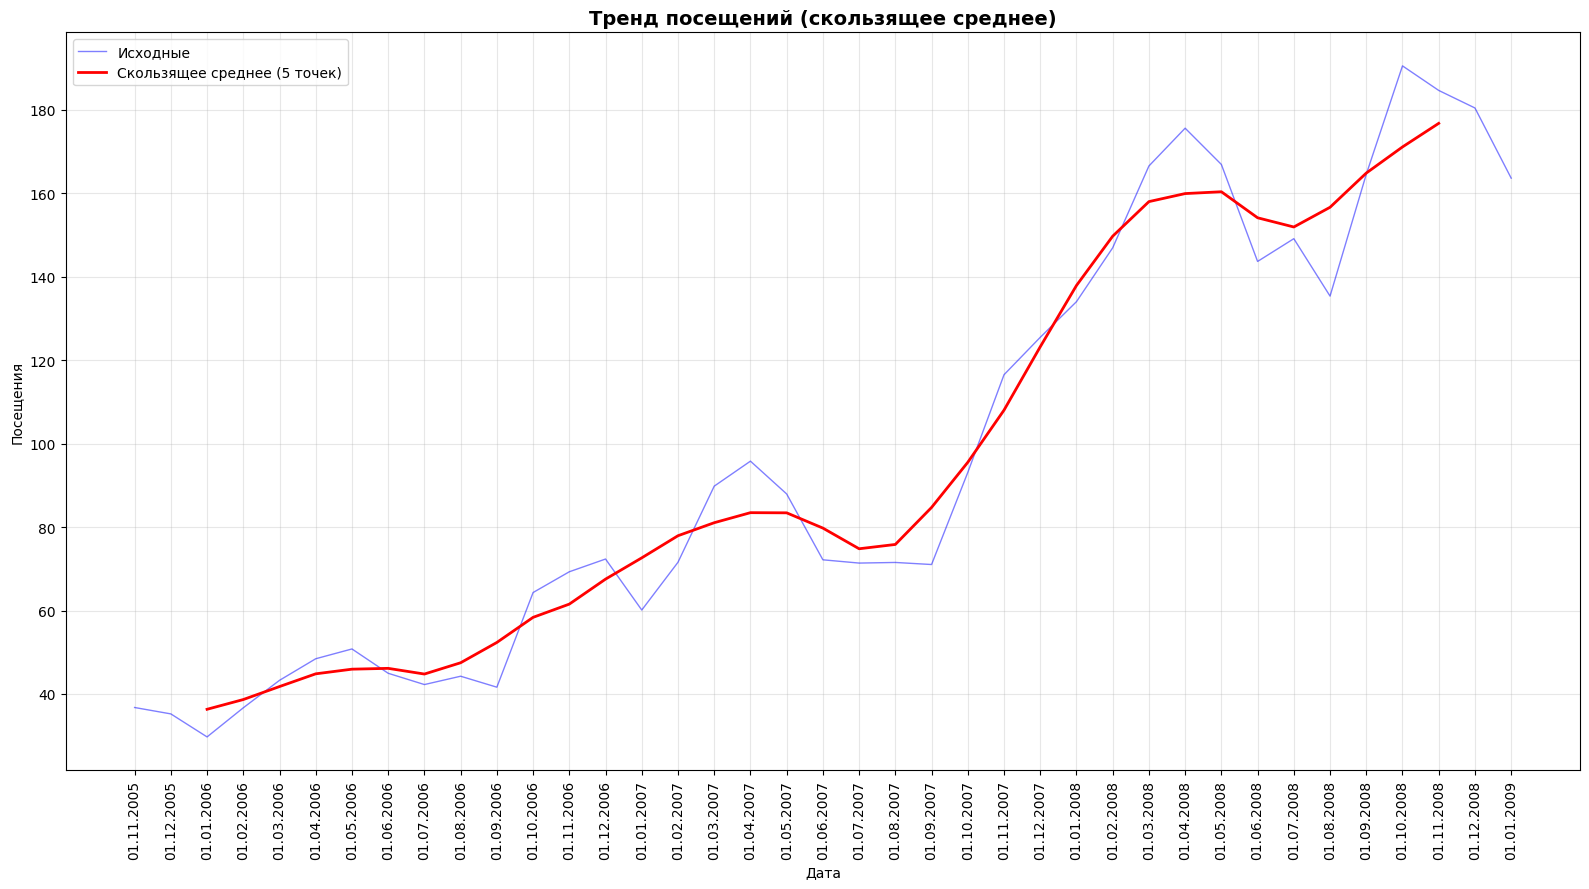

In [602]:
window_size = 5
df['Скользящее_среднее'] = df['Посещения'].rolling(window=window_size, center=True).mean()

plt.figure(figsize=(16, 9))
plt.plot(df['Дата'], df['Посещения'], 'b-', linewidth=1, alpha=0.5, label='Исходные')
plt.plot(df['Дата'], df['Скользящее_среднее'], 'r-', linewidth=2, label=f'Скользящее среднее ({window_size} точек)')
plt.title('Тренд посещений (скользящее среднее)', fontsize=14, fontweight='bold')
plt.xlabel('Дата')
plt.ylabel('Посещения')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=90)

plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()

In [603]:
def spectral_smoothing(data, bandwidth=50):
    n = len(data)

    fft_data = fft.fft(data)
    frequencies = fft.fftfreq(n)

    cutoff_freq = bandwidth / 1000

    filter_gauss = np.exp(-(frequencies / cutoff_freq) ** 2)

    fft_filtered = fft_data * filter_gauss

    smoothed = np.real(fft.ifft(fft_filtered))

    return smoothed

In [604]:
def noise_subtraction_spectral(data, subtraction_level='medium'):
    n = len(data)

    fft_data = fft.fft(data)
    magnitude = np.abs(fft_data)
    phase = np.angle(fft_data)

    noise_estimate = np.median(magnitude)

    if subtraction_level == 'low':
        subtract_factor = 0.7
    elif subtraction_level == 'medium':
        subtract_factor = 1.0
    elif subtraction_level == 'high':
        subtract_factor = 1.5
    else:
        subtract_factor = 1.0

    magnitude_clean = np.maximum(magnitude - subtract_factor * noise_estimate, magnitude * 0.1)

    fft_clean = magnitude_clean * np.exp(1j * phase)
    cleaned = np.real(fft.ifft(fft_clean))

    return cleaned

In [605]:
def wavelet_denoising(data, wavelet='db6', level=3, threshold_factor=0.1):
    max_level = pywt.dwt_max_level(len(data), wavelet)
    actual_level = min(level, max_level)

    coeffs = pywt.wavedec(data, wavelet, level=actual_level)

    coeffs_thresholded = [coeffs[0]]

    for i in range(1, len(coeffs)):
        sigma = np.median(np.abs(coeffs[i])) / 0.6745
        if sigma == 0:
            sigma = 0.01
        threshold = sigma * np.sqrt(2 * np.log(len(data)))

        coeff_thresholded = pywt.threshold(coeffs[i], threshold_factor * threshold, mode='soft')
        coeffs_thresholded.append(coeff_thresholded)

    denoised = pywt.waverec(coeffs_thresholded, wavelet)

    if len(denoised) > len(data):
        denoised = denoised[:len(data)]
    elif len(denoised) < len(data):
        denoised = np.pad(denoised, (0, len(data) - len(denoised)), 'edge')
    return denoised


In [606]:
print("\n1. УЗЕЛ: 'Спектральное сглаживание (полоса 50)'")
df['Спектральное_сглаживание'] = spectral_smoothing(df['Посещения'].values, bandwidth=50)
print(f"   Параметры: полоса пропускания = 50")

print("\n2. УЗЕЛ: 'Вычитание шума (средняя степень)'")
df['Вычитание_шума'] = noise_subtraction_spectral(df['Посещения'].values, subtraction_level='medium')
print(f"   Параметры: средняя степень вычитания")

print("\n3. УЗЕЛ: 'Вейвлет преобразование (глубина 3 порядок 6)'")
df['Вейвлет_преобразование'] = wavelet_denoising(df['Посещения'].values, wavelet='db6', level=3, threshold_factor=0.1)
print(f"   Параметры: глубина = 3, порядок = 6 (db6)")


1. УЗЕЛ: 'Спектральное сглаживание (полоса 50)'
   Параметры: полоса пропускания = 50

2. УЗЕЛ: 'Вычитание шума (средняя степень)'
   Параметры: средняя степень вычитания

3. УЗЕЛ: 'Вейвлет преобразование (глубина 3 порядок 6)'
   Параметры: глубина = 3, порядок = 6 (db6)


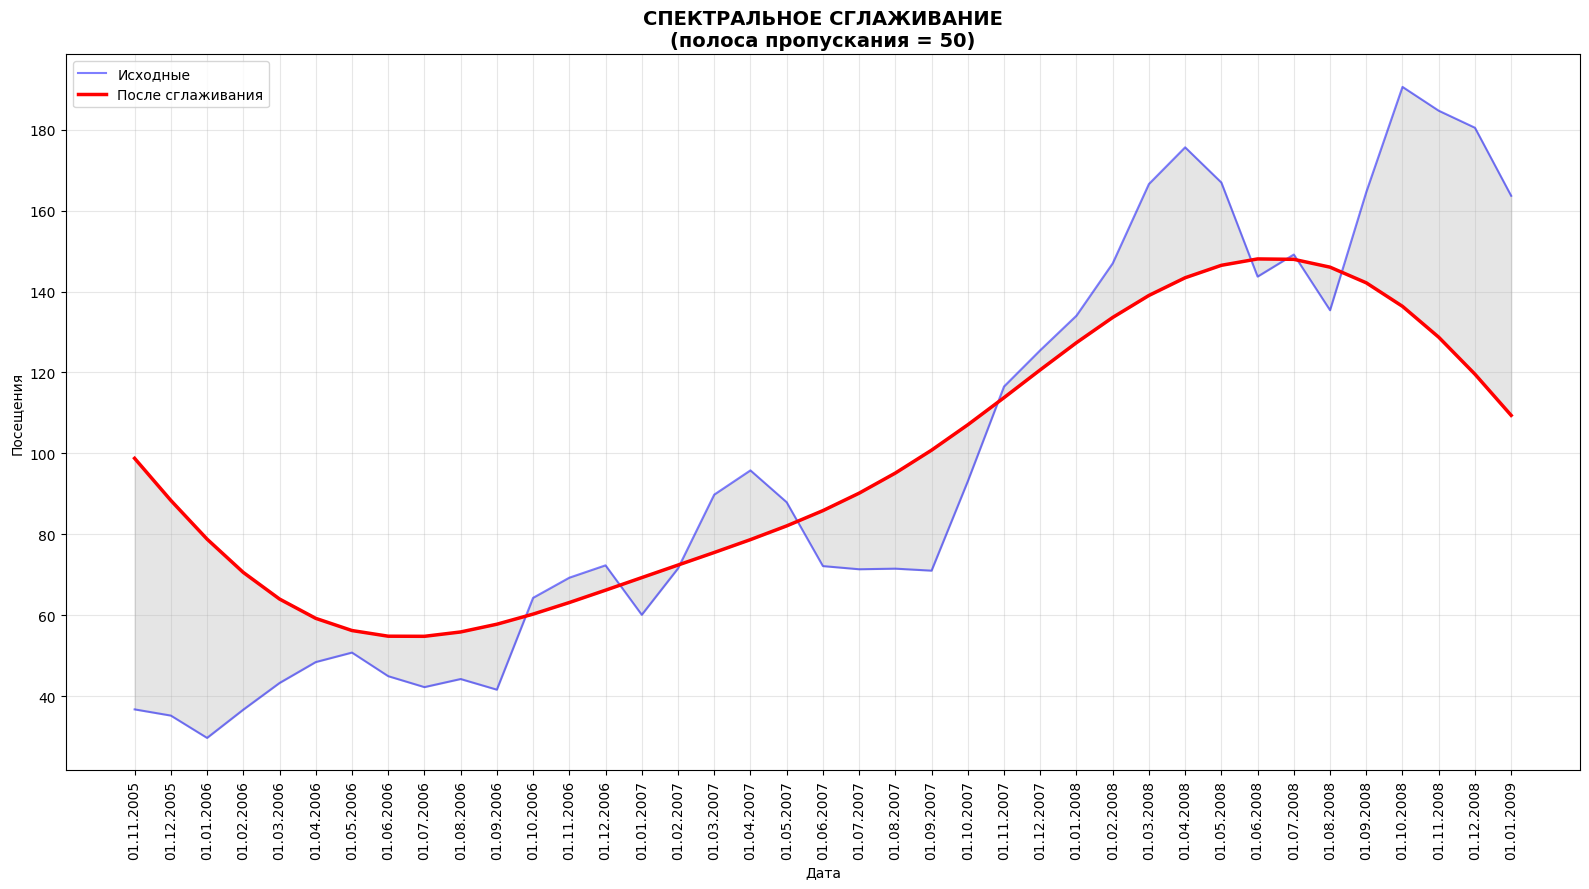

In [607]:
plt.figure(figsize=(16, 9))
plt.plot(df['Дата'], df['Посещения'], 'b-', linewidth=1.5, alpha=0.5, label='Исходные')
plt.plot(df['Дата'], df['Спектральное_сглаживание'], 'r-', linewidth=2.5, label='После сглаживания')
plt.fill_between(df['Дата'], df['Посещения'], df['Спектральное_сглаживание'], alpha=0.2, color='gray')
plt.title('СПЕКТРАЛЬНОЕ СГЛАЖИВАНИЕ\n(полоса пропускания = 50)', fontsize=14, fontweight='bold')
plt.xlabel('Дата')
plt.ylabel('Посещения')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=90)

plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()

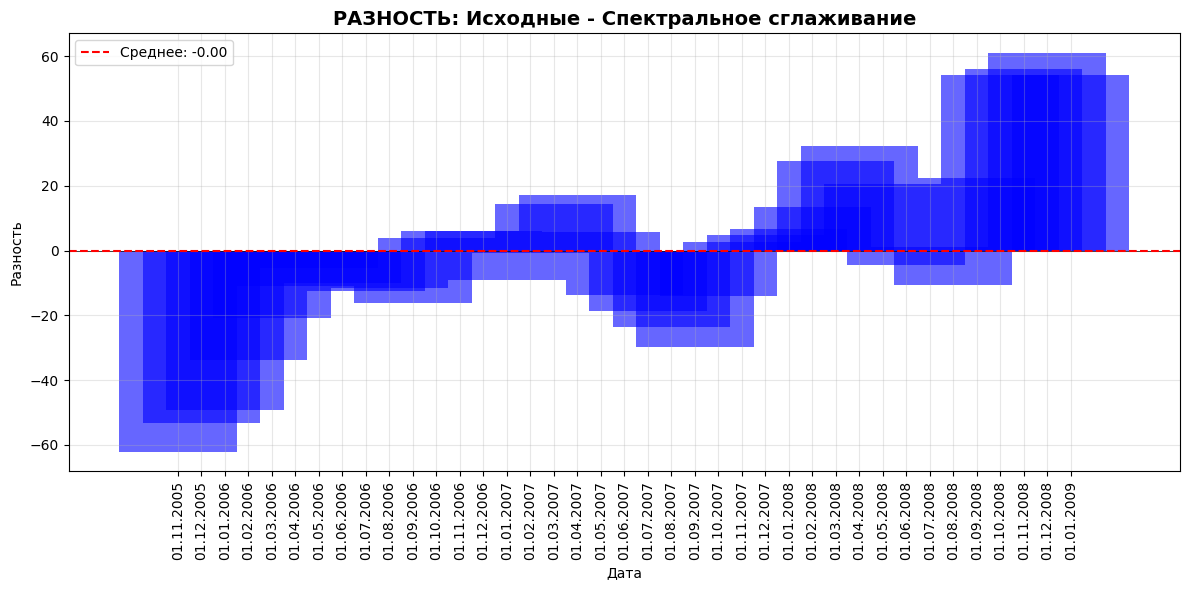

In [608]:
plt.figure(figsize=(12, 6))
residual_spectral = df['Посещения'] - df['Спектральное_сглаживание']
plt.bar(df['Дата'], residual_spectral, alpha=0.6, color='blue', width=5)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.axhline(y=residual_spectral.mean(), color='red', linestyle='--',
           linewidth=1.5, label=f'Среднее: {residual_spectral.mean():.2f}')
plt.title('РАЗНОСТЬ: Исходные - Спектральное сглаживание', fontsize=14, fontweight='bold')
plt.xlabel('Дата')
plt.ylabel('Разность')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=90)

plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()

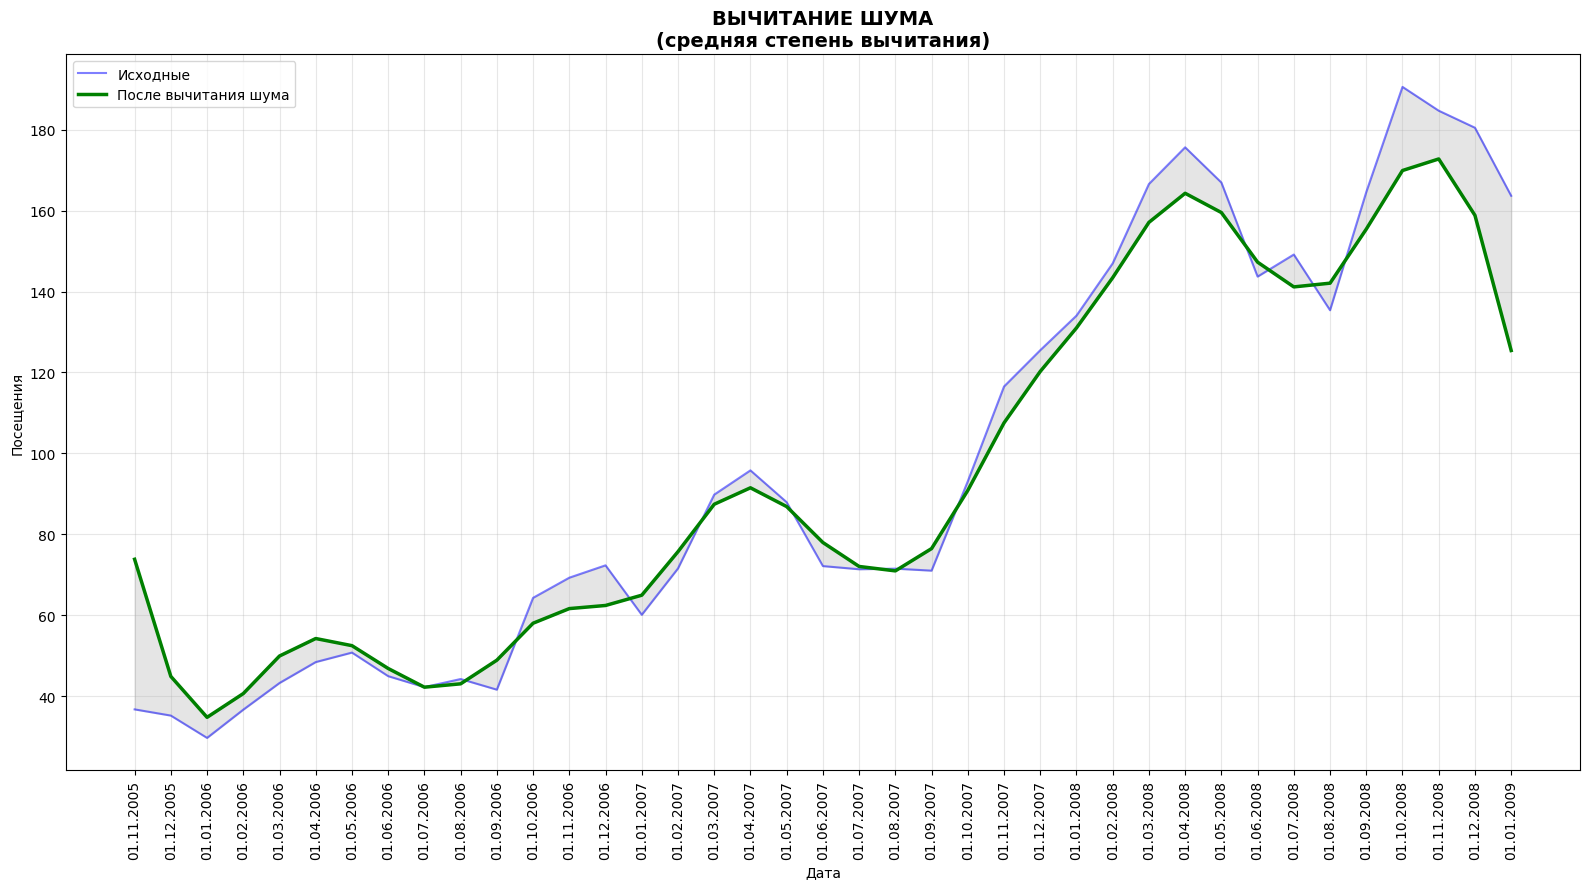

In [609]:
plt.figure(figsize=(16, 9))
plt.plot(df['Дата'], df['Посещения'], 'b-', linewidth=1.5, alpha=0.5, label='Исходные')
plt.plot(df['Дата'], df['Вычитание_шума'], 'g-', linewidth=2.5, label='После вычитания шума')
plt.fill_between(df['Дата'], df['Посещения'], df['Вычитание_шума'],
                 alpha=0.2, color='gray')
plt.title('ВЫЧИТАНИЕ ШУМА\n(средняя степень вычитания)', fontsize=14, fontweight='bold')
plt.xlabel('Дата')
plt.ylabel('Посещения')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=90)

plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()

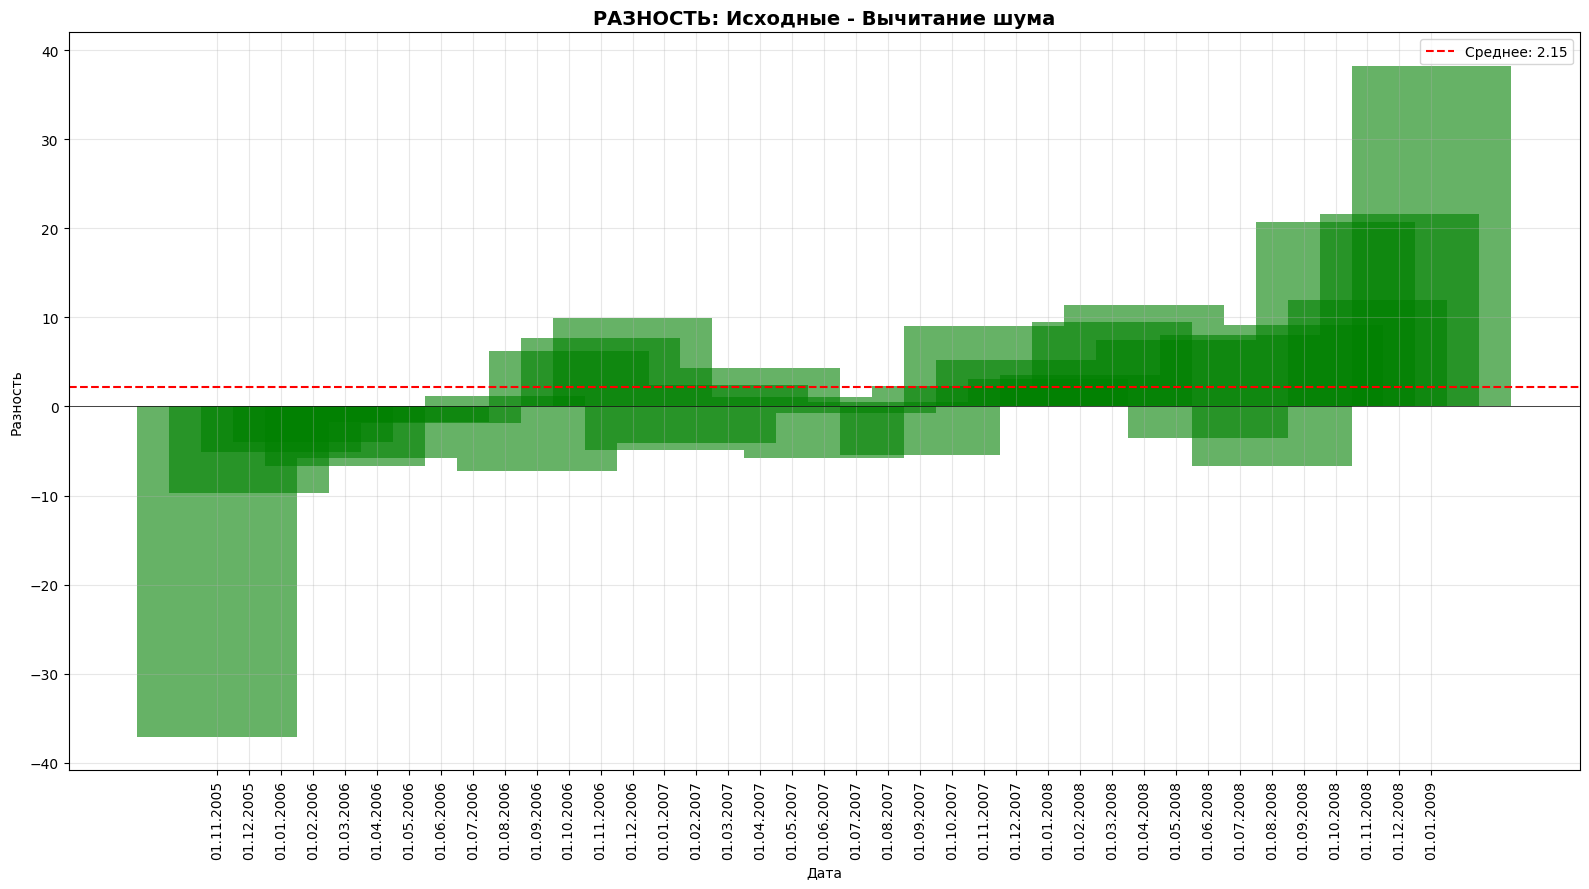

In [610]:
plt.figure(figsize=(16, 9))
residual_noise = df['Посещения'] - df['Вычитание_шума']
plt.bar(df['Дата'], residual_noise, alpha=0.6, color='green', width=5)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.axhline(y=residual_noise.mean(), color='red', linestyle='--',
           linewidth=1.5, label=f'Среднее: {residual_noise.mean():.2f}')
plt.title('РАЗНОСТЬ: Исходные - Вычитание шума', fontsize=14, fontweight='bold')
plt.xlabel('Дата')
plt.ylabel('Разность')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=90)

plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()


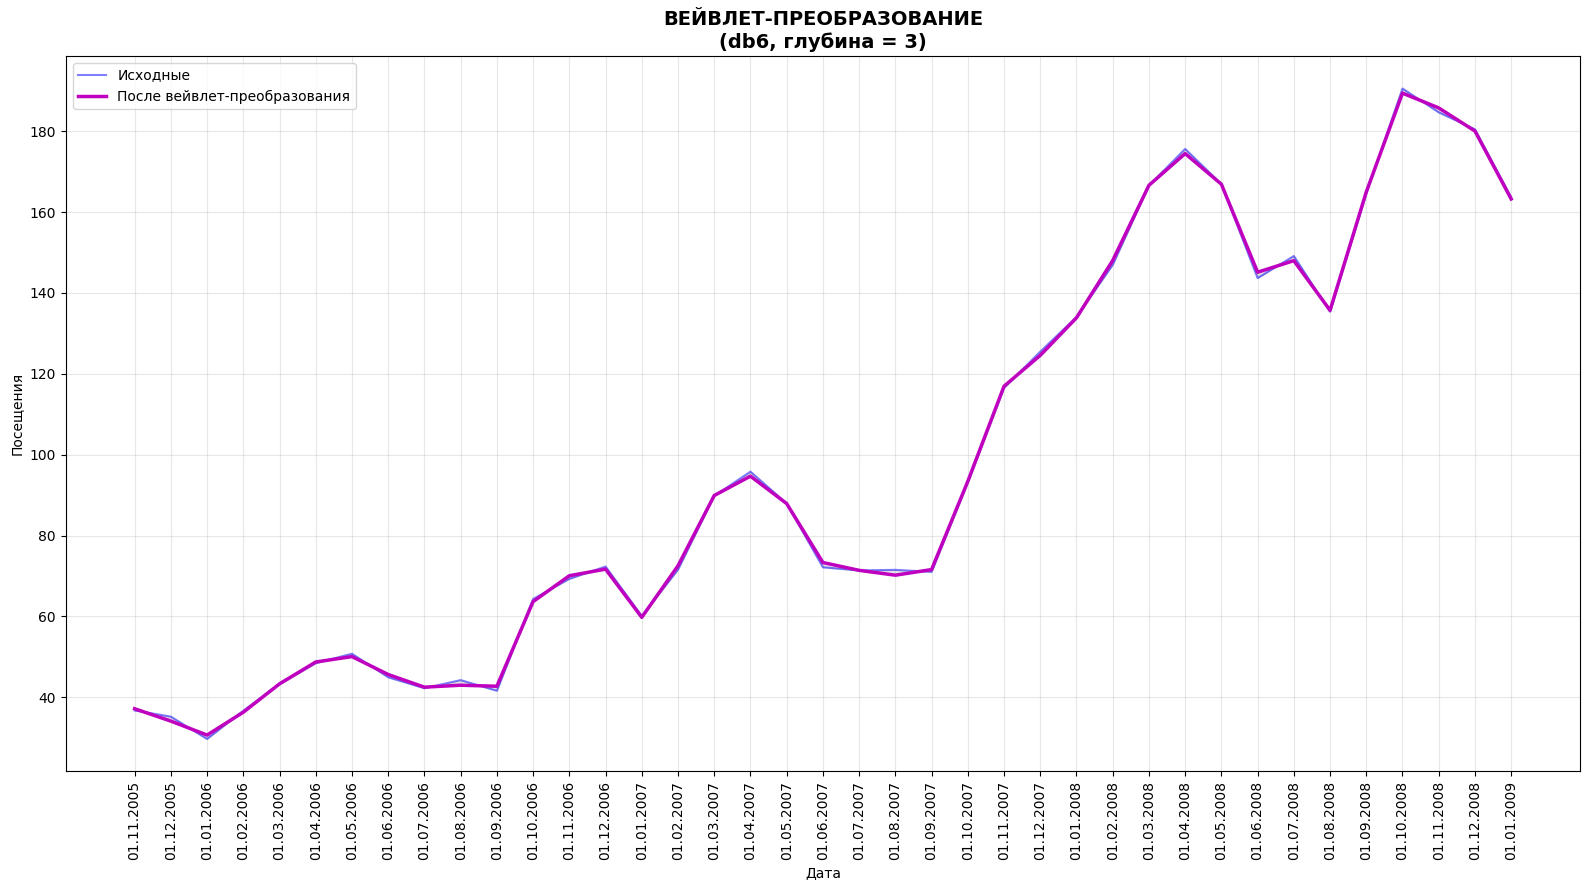

In [611]:
# 9. График вейвлет-преобразования
plt.figure(figsize=(16, 9))
plt.plot(df['Дата'], df['Посещения'], 'b-', linewidth=1.5, alpha=0.5, label='Исходные')
plt.plot(df['Дата'], df['Вейвлет_преобразование'], 'm-', linewidth=2.5, label='После вейвлет-преобразования')
plt.fill_between(df['Дата'], df['Посещения'], df['Вейвлет_преобразование'],
                 alpha=0.2, color='gray')
plt.title('ВЕЙВЛЕТ-ПРЕОБРАЗОВАНИЕ\n(db6, глубина = 3)', fontsize=14, fontweight='bold')
plt.xlabel('Дата')
plt.ylabel('Посещения')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=90)

plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()

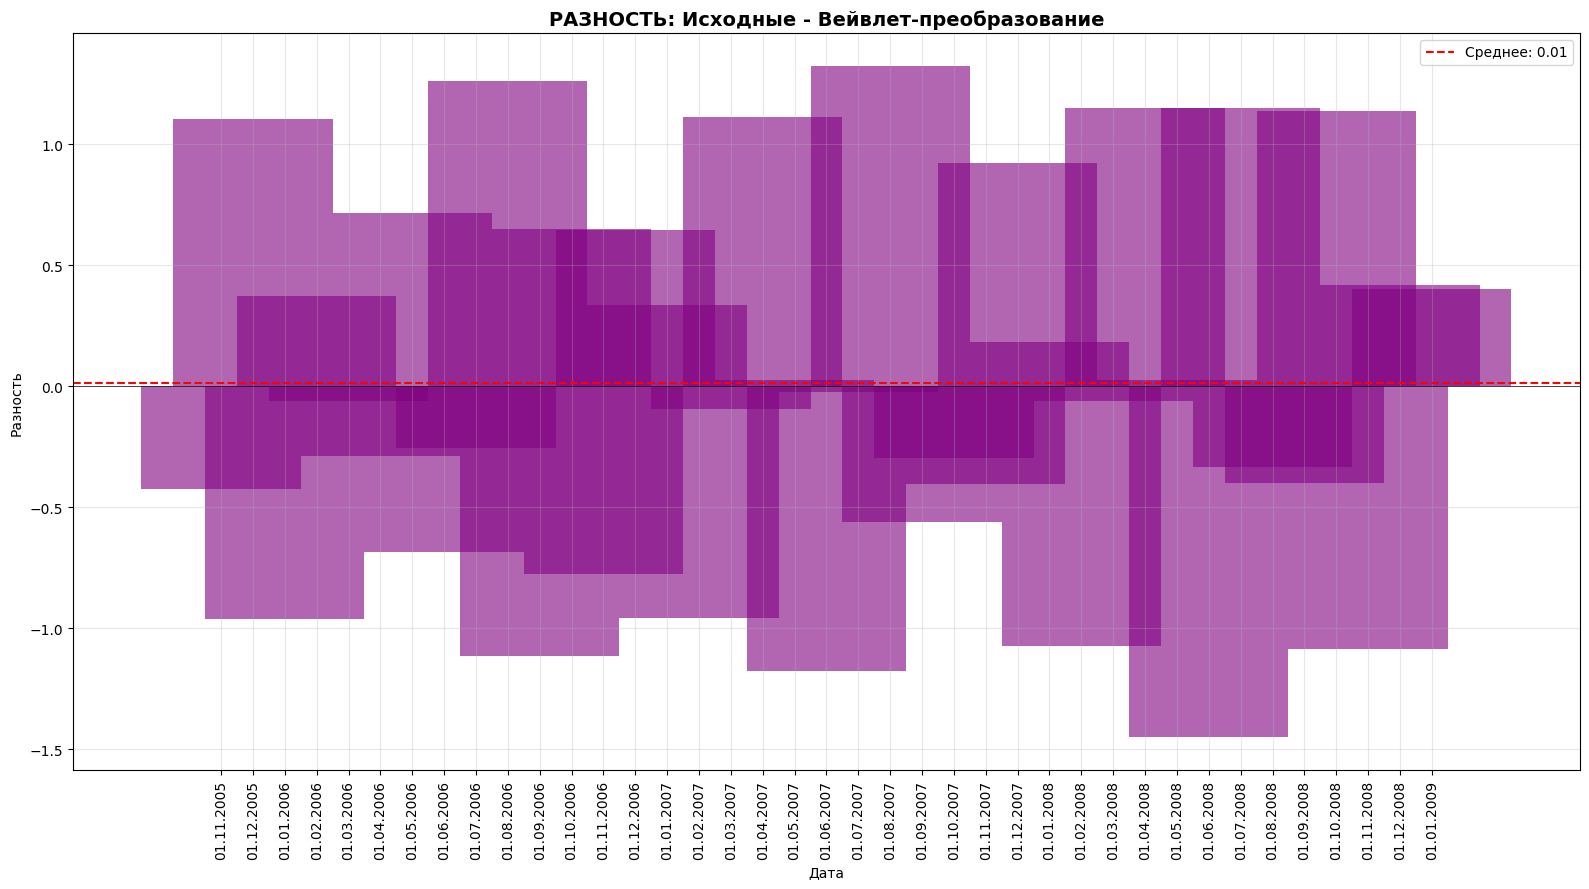

In [612]:
# 10. Разность для вейвлет-преобразования
plt.figure(figsize=(16, 9))
residual_wavelet = df['Посещения'] - df['Вейвлет_преобразование']
plt.bar(df['Дата'], residual_wavelet, alpha=0.6, color='purple', width=5)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.axhline(y=residual_wavelet.mean(), color='red', linestyle='--',
           linewidth=1.5, label=f'Среднее: {residual_wavelet.mean():.2f}')
plt.title('РАЗНОСТЬ: Исходные - Вейвлет-преобразование', fontsize=14, fontweight='bold')
plt.xlabel('Дата')
plt.ylabel('Разность')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=90)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

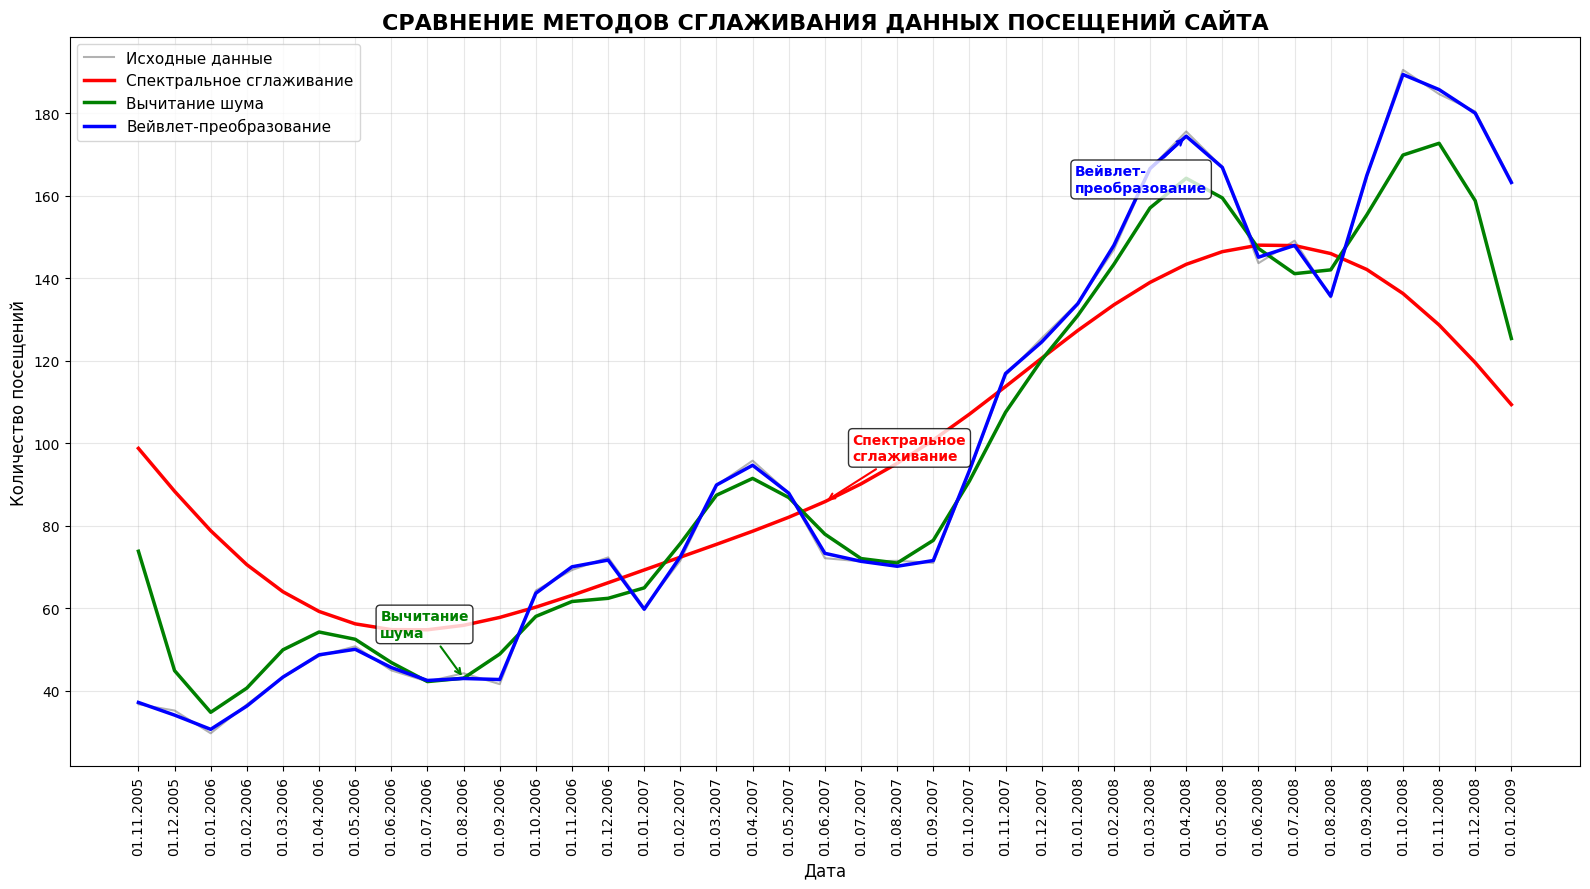

In [613]:
plt.figure(figsize=(16, 9))

plt.plot(df['Дата'], df['Посещения'], 'k-', linewidth=1.5, alpha=0.3, label='Исходные данные')
plt.plot(df['Дата'], df['Спектральное_сглаживание'], 'r-', linewidth=2.5, label='Спектральное сглаживание')
plt.plot(df['Дата'], df['Вычитание_шума'], 'g-', linewidth=2.5, label='Вычитание шума')
plt.plot(df['Дата'], df['Вейвлет_преобразование'], 'b-', linewidth=2.5, label='Вейвлет-преобразование')

plt.title('СРАВНЕНИЕ МЕТОДОВ СГЛАЖИВАНИЯ ДАННЫХ ПОСЕЩЕНИЙ САЙТА', fontsize=16, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество посещений', fontsize=12)
plt.legend(loc='best', fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=90)
plt.gca().invert_xaxis()

# Добавляем аннотации для методов
mid_idx = len(df) // 2
plt.annotate('Спектральное\nсглаживание',
             xy=(df['Дата'].iloc[mid_idx], df['Спектральное_сглаживание'].iloc[mid_idx]),
             xytext=(20, 30), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='red', linewidth=1.5),
             fontsize=10, color='red', fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.annotate('Вычитание\nшума',
             xy=(df['Дата'].iloc[mid_idx + 10], df['Вычитание_шума'].iloc[mid_idx + 10]),
             xytext=(-60, 30), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='green', linewidth=1.5),
             fontsize=10, color='green', fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.annotate('Вейвлет-\nпреобразование',
             xy=(df['Дата'].iloc[mid_idx - 10], df['Вейвлет_преобразование'].iloc[mid_idx - 10]),
             xytext=(-80, -40), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='blue', linewidth=1.5),
             fontsize=10, color='blue', fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

Самостоятельное задание ---

In [614]:
df = pd.read_csv('Trade.txt', sep='\t', encoding='windows-1251')
print(df.head())
print(df.info())

  Дата (Год + Месяц)   Количество
0           2000-M01  462523.4190
1           2000-M02  633208.1960
2           2000-M03  660159.2990
3           2000-M04  617455.3417
4           2000-M05  597354.4794
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Дата (Год + Месяц)  50 non-null     object 
 1   Количество          50 non-null     float64
dtypes: float64(1), object(1)
memory usage: 932.0+ bytes
None


In [615]:
df.columns = ['Date', 'Value']

In [616]:
df['Date'] = pd.to_datetime(df['Date'].str.replace('M', ''), format='%Y-%m')

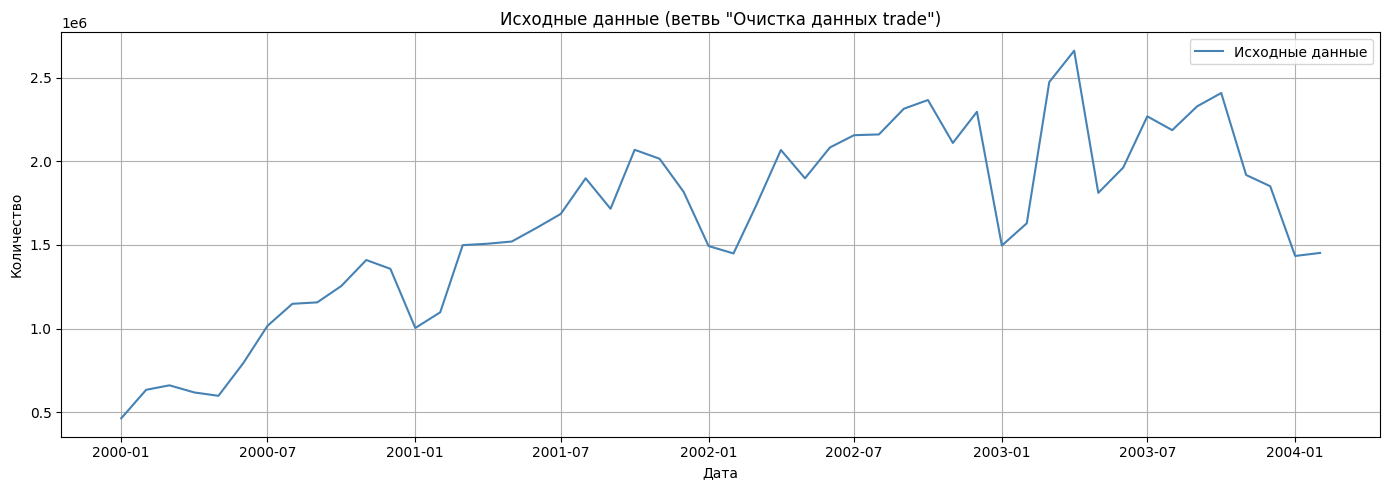

In [617]:
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['Value'], label='Исходные данные', color='steelblue')
plt.title('Исходные данные (ветвь "Очистка данных trade")')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [618]:
df_parcial = df.copy()

In [619]:
z_scores = np.abs(zscore(df_parcial['Value']))
df_parcial['is_outlier'] = z_scores > 3
df_parcial.loc[df_parcial['is_outlier'], 'Value'] = np.nan

x = np.arange(len(df_parcial))
y = df_parcial['Value'].values
valid_mask = ~np.isnan(y)
poly_coefs = np.polyfit(x[valid_mask], y[valid_mask], deg=3)
y_approx = np.polyval(poly_coefs, x)
df_parcial['Approx'] = y_approx

window_len = min(5, len(df_parcial) // 2 * 2 - 1)
if window_len < 3:
    window_len = 3
df_parcial['Smoothed'] = savgol_filter(df_parcial['Approx'], window_length=window_len, polyorder=1)

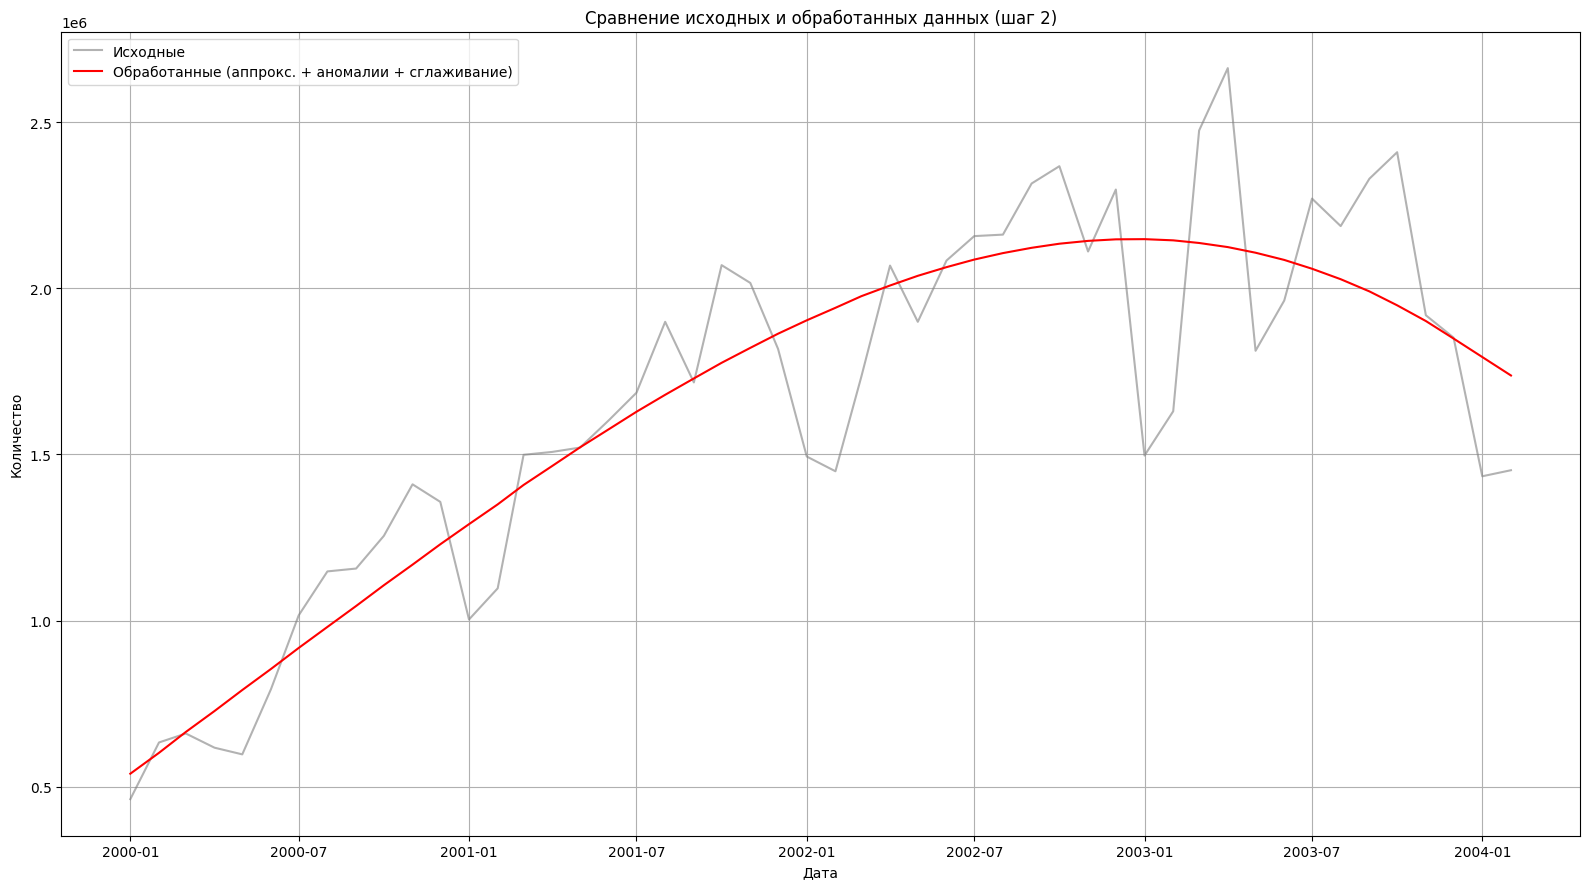

In [620]:
plt.figure(figsize=(16, 9))
plt.plot(df['Date'], df['Value'], label='Исходные', alpha=0.6, color='gray')
plt.plot(df['Date'], df_parcial['Smoothed'], label='Обработанные (аппрокс. + аномалии + сглаживание)', color='red')
plt.title('Сравнение исходных и обработанных данных (шаг 2)')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [621]:
coeffs = pywt.wavedec(df_parcial['Value'], wavelet='db6', level=2)

sigma = np.median(np.abs(coeffs[-1])) / 0.6745
threshold = sigma * np.sqrt(2 * np.log(len(df_parcial)))
coeffs_thresh = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]
y_wavelet = pywt.waverec(coeffs_thresh, wavelet='db6')[:len(df_parcial)]
df_parcial['Wavelet'] = y_wavelet

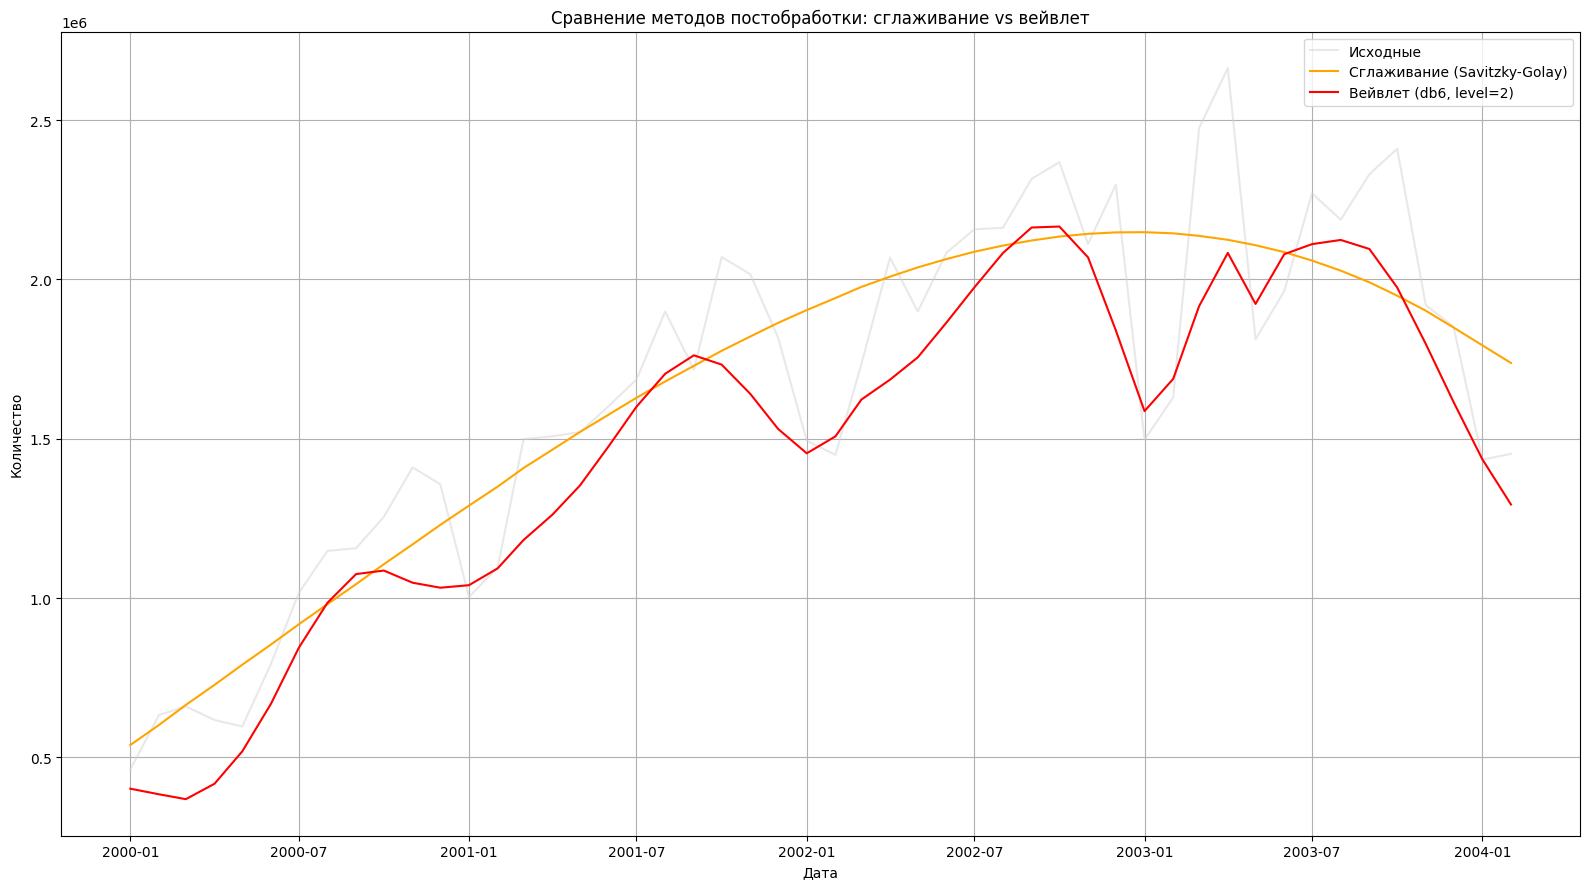

In [622]:
plt.figure(figsize=(16, 9))
plt.plot(df['Date'], df['Value'], label='Исходные', alpha=0.5, color='lightgray')
plt.plot(df['Date'], df_parcial['Smoothed'], label='Сглаживание (Savitzky-Golay)', color='orange')
plt.plot(df['Date'], df_parcial['Wavelet'], label='Вейвлет (db6, level=2)', color='Red')
plt.title('Сравнение методов постобработки: сглаживание vs вейвлет')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()